<a href="https://colab.research.google.com/github/naveenhmg1619/data-analysis/blob/main/Data_Analysis_BeerAdvocate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Questions

- Which brewery produces the strongest beers by abv ?

- If you had to pick 3 beers to recommend to someone, how would you approach the problem ?

- What are the factors that impacts the quality of beer the most ?

- I enjoy a beer which aroma and appearance matches the beer style. What beer should I buy ?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://query.data.world/s/cugqleyv67c23unepllclxxxo7oqfm?dws=00000')
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


In [ ]:
df.groupby(['brewery_name', 'beer_beerid']).ngroups  #number of unique beer_id and brewery combinations

66044

## Which brewery produces the strongest beers by abv ?

In [ ]:
df['beer_abv'].max()

57.7

In [ ]:
df['beer_abv'].min()

0.01

<Axes: ylabel='Count'>

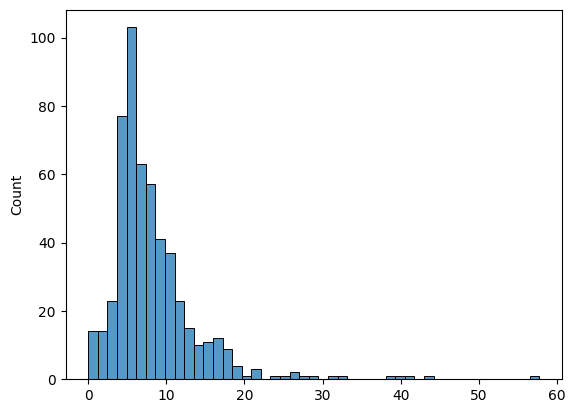

In [ ]:
sns.histplot(df['beer_abv'].unique())  #range of the ABV is from 0 to 57.7

In [ ]:
# remocing records which contain NaN values for 'beer_abv', since data is not available for those records
df_beer_abv = df.dropna(subset = ['beer_abv'])

In [ ]:
df_beer_abv.shape

(1518829, 13)

In [ ]:
# grouping records by Brewery and BeerId, since there are duplicate records. After taking average of the ABV for each Brewery-Beer combination
df_beer_average_abv = df_beer_abv.groupby(['brewery_name', 'beer_beerid'])['beer_abv'].mean()
df_beer_average_abv

brewery_name          beer_beerid
't Hofbrouwerijke     28810           8.5
                      28825           6.2
                      33506           5.5
                      33518           6.5
                      49512           5.0
                                     ... 
Ørbæk Bryggeri        47485          10.1
                      55144           5.0
                      59088           5.0
                      59860           4.6
Łódzkie Browary S.A.  65334           9.5
Name: beer_abv, Length: 49001, dtype: float64

In [ ]:
# resetting index to get records with Brewery name
df_beer_average_abv = df_beer_average_abv.reset_index()
df_beer_average_abv

,brewery_name,beer_beerid,beer_abv
0,'t Hofbrouwerijke,28810,8.5
1,'t Hofbrouwerijke,28825,6.2
2,'t Hofbrouwerijke,33506,5.5
3,'t Hofbrouwerijke,33518,6.5
4,'t Hofbrouwerijke,49512,5.0
...,...,...,...
48996,Ørbæk Bryggeri,47485,10.1
48997,Ørbæk Bryggeri,55144,5.0
48998,Ørbæk Bryggeri,59088,5.0
48999,Ørbæk Bryggeri,59860,4.6


In [ ]:
# sorting the Beers based on the Beer-ABV in the descending order to get the beers with the highest ABV and getting the Top 10 beers
brewery_strong_beer = df_beer_average_abv[['brewery_name', 'beer_abv']].iloc[df_beer_average_abv['beer_abv'].argsort()[::-1]].head(10)
brewery_strong_beer

,brewery_name,beer_abv
39038,Schorschbräu,57.70
39035,Schorschbräu,43.00
8400,BrewDog,41.00
39034,Schorschbräu,39.44
14756,De Struise Brouwers,39.00
8398,BrewDog,32.00
39033,Schorschbräu,30.86
21218,Hair of the Dog Brewing Company / Brewery and ...,29.00
8436,BrewDog,28.00
5778,Boston Beer Company (Samuel Adams),27.00


In [ ]:
# displaying the count and mean ABV for each Brewery based on the Top 10 Beers with highest ABV.
brewery_strong_beer.groupby(['brewery_name'])['beer_abv'].aggregate(['count', 'mean']).sort_values(['count'], ascending = False)

,count,mean
brewery_name,,
Schorschbräu,4,42.750000
BrewDog,3,33.666667
Boston Beer Company (Samuel Adams),1,27.000000
De Struise Brouwers,1,39.000000
Hair of the Dog Brewing Company / Brewery and Tasting Room,1,29.000000


### Among the top 10 beers with the highest ABV (Alcohol By Volume), **Schorschbräu** produces 4 beers with the average ABV of 42.75

## If you had to pick 3 beers to recommend to someone, how would you approach the problem ?

In [ ]:
df.info() #we do not have any NaN values for the ratings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


In [ ]:
df.describe()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.518829e+06,1.586614e+06
mean,3.130099e+03,1.224089e+09,3.815581e+00,3.735636e+00,3.841642e+00,3.743701e+00,3.792860e+00,7.042387e+00,2.171279e+04
std,5.578104e+03,7.654427e+07,7.206219e-01,6.976167e-01,6.160928e-01,6.822184e-01,7.319696e-01,2.322526e+00,2.181834e+04
min,1.000000e+00,8.406720e+08,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,3.000000e+00
25%,1.430000e+02,1.173224e+09,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00,1.717000e+03
50%,4.290000e+02,1.239203e+09,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00,1.390600e+04
75%,2.372000e+03,1.288568e+09,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00,3.944100e+04
max,2.800300e+04,1.326285e+09,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01,7.731700e+04


In [ ]:
# picking all the beers with overall ratings = 5
#top_rated_beers = df[(df['review_overall'] == 5) & (df['review_aroma'] == 5) & (df['review_appearance'] == 5) & (df['review_palate'] == 5) & (df['review_taste'] == 5)]
top_rated_beers = df[(df['review_overall'] == 5)]
top_rated_beers.head(5)

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
11,1075,Caldera Brewing Company,1283154365,5.0,5.0,4.0,MadeInOregon,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159
25,1075,Caldera Brewing Company,1318802642,5.0,5.0,3.5,optimator13,Rauchbier,3.5,5.0,Rauch Ür Bock,7.4,58046
31,1075,Caldera Brewing Company,1315014054,5.0,4.5,4.0,Bung,Rauchbier,4.0,5.0,Rauch Ür Bock,7.4,58046
42,1075,Caldera Brewing Company,1305926255,5.0,4.5,3.5,Deuane,Rauchbier,4.0,5.0,Rauch Ür Bock,7.4,58046
73,1075,Caldera Brewing Company,1246913078,5.0,4.0,4.5,GratefulBeerGuy,American Pale Ale (APA),4.5,4.0,Caldera Pale Ale,5.5,25414


In [ ]:
# sorting the beers based on the number of reviews with the Top rating for each BearId
top_rated_beers_sorted = top_rated_beers['beer_beerid'].value_counts().reset_index()
top_rated_beers_sorted.rename(columns = {'beer_beerid' : 'top_ratings'}, inplace = True)
top_rated_beers_sorted

,index,top_ratings
0,7971,1067
1,731,695
2,17112,630
3,1545,594
4,695,591
...,...,...
12431,46117,1
12432,42545,1
12433,36872,1
12434,46879,1


In [ ]:
# finding the number of reviews available for each BeerId
beer_review_counts = df['beer_beerid'].value_counts().reset_index()
beer_review_counts.rename(columns = {'beer_beerid' : 'all_ratings'}, inplace = True)
beer_review_counts

,index,all_ratings
0,2093,3290
1,412,3111
2,1904,3000
3,1093,2728
4,92,2704
...,...,...
66050,12708,1
66051,70915,1
66052,21441,1
66053,62863,1


In [ ]:
# merging two dataframes to get top_ratings and all_rating in a single dataframe
top_beers = top_rated_beers_sorted.merge(beer_review_counts, how = 'left', on = 'index')
top_beers

,index,top_ratings,all_ratings
0,7971,1067,2527
1,731,695,1981
2,17112,630,2443
3,1545,594,1272
4,695,591,2450
...,...,...,...
12431,46117,1,4
12432,42545,1,3
12433,36872,1,22
12434,46879,1,1


In [ ]:
# finding the percentage of top ratings for the beers
top_beers['top_rating_percent'] = top_beers.apply(lambda x : x['top_ratings'] / x['all_ratings'] * 100, axis = 1)

# among the top 10 beers with the highest overall rating, which beers has the highest positive reviews.
top_10_beers = top_beers.head(10).sort_values(by = ['top_rating_percent'], ascending = False)
top_10_beers

,index,top_ratings,all_ratings,top_rating_percent
3,1545,594,1272,46.698113
0,7971,1067,2527,42.223981
1,731,695,1981,35.083291
6,19960,520,1932,26.915114
2,17112,630,2443,25.787966
4,695,591,2450,24.122449
9,645,464,2170,21.382488
5,1093,554,2728,20.307918
7,11757,507,2502,20.263789
8,34,492,2483,19.814740


In [ ]:
# finding the names of the beers by using the beer id as the reference value
top_10_beers.head(3).merge(df[['beer_beerid', 'beer_name']].value_counts().reset_index(), left_on = 'index', right_on = 'beer_beerid', how = 'left')[['beer_name', 'top_rating_percent']]

,beer_name,top_rating_percent
0,Trappist Westvleteren 12,46.698113
1,Pliny The Elder,42.223981
2,Weihenstephaner Hefeweissbier,35.083291


### If I had to pick 3 beers to recommend, I will recomment these
        1.   Trappist Westvleteren 12
        2.   Pliny The Elder
        3.   Weihenstephaner Hefeweissbier



## What are the factors that impacts the quality of beer the most ?

In [ ]:
# dataframe with only the review scores
df_review = df[['review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv']]
df_corr = df_review.corr()['review_overall']
df_corr

review_overall       1.000000
review_aroma         0.616013
review_appearance    0.501732
review_palate        0.701914
review_taste         0.789816
beer_abv             0.138512
Name: review_overall, dtype: float64

In [ ]:
# sorting the correlation in descending order
df_corr.sort_values(ascending = False)

review_overall       1.000000
review_taste         0.789816
review_palate        0.701914
review_aroma         0.616013
review_appearance    0.501732
beer_abv             0.138512
Name: review_overall, dtype: float64

### The factor that impacts the quality of the beer most is the Taste, followed by Palate, Aroma and Appearance is the last factor.

## Looking for a beer style that consistently scores high for both aroma and appearance. What beer should I buy ?

In [ ]:
df['beer_style'].value_counts()

American IPA                        117586
American Double / Imperial IPA       85977
American Pale Ale (APA)              63469
Russian Imperial Stout               54129
American Double / Imperial Stout     50705
                                     ...  
Gose                                   686
Faro                                   609
Roggenbier                             466
Kvass                                  297
Happoshu                               241
Name: beer_style, Length: 104, dtype: int64

In [ ]:
# filtering out beers with aroma and appearance rated above 3

df_aroma_appear = df[(df['review_aroma'] >= 4) & (df['review_appearance'] >= 4)]
df_aroma_appear.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883
11,1075,Caldera Brewing Company,1283154365,5.0,5.0,4.0,MadeInOregon,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159
12,1075,Caldera Brewing Company,1277557990,4.0,4.0,4.0,rawthar,Herbed / Spiced Beer,3.5,4.0,Caldera Ginger Beer,4.7,52159
20,1075,Caldera Brewing Company,1325360812,4.0,4.0,4.0,zaphodchak,Rauchbier,3.0,4.0,Rauch Ür Bock,7.4,58046
21,1075,Caldera Brewing Company,1322506304,4.0,4.5,4.0,Tilley4,Rauchbier,3.5,4.0,Rauch Ür Bock,7.4,58046


In [ ]:
# beer_style with the count of reviews above 3 for aroma and appearance
beerstyle_top_review = df_aroma_appear.groupby('beer_style')['beer_beerid'].count().reset_index()
beerstyle_top_review.rename(columns = {'beer_beerid' : 'top_reviews'}, inplace = True)
beerstyle_top_review

,beer_style,top_reviews
0,Altbier,2675
1,American Adjunct Lager,693
2,American Amber / Red Ale,16896
3,American Amber / Red Lager,1388
4,American Barleywine,17187
...,...,...
99,Vienna Lager,2257
100,Weizenbock,6003
101,Wheatwine,2062
102,Winter Warmer,8277


In [ ]:
# total number of reviews for each beer type
beerstyle_total_review = df.groupby('beer_style')['beer_beerid'].count().reset_index()
beerstyle_total_review.rename(columns = {'beer_beerid' : 'all_reviews'}, inplace = True)
beerstyle_total_review.sort_values('all_reviews')

,beer_style,all_reviews
64,Happoshu,241
72,Kvass,297
88,Roggenbier,466
56,Faro,609
62,Gose,686
...,...,...
11,American Double / Imperial Stout,50705
89,Russian Imperial Stout,54129
14,American Pale Ale (APA),63469
9,American Double / Imperial IPA,85977


In [ ]:
#merging top reviews and top reviews
beerstyle_review = beerstyle_top_review.merge(beerstyle_total_review, on = 'beer_style', how = 'left')
beerstyle_review

,beer_style,top_reviews,all_reviews
0,Altbier,2675,7741
1,American Adjunct Lager,693,30749
2,American Amber / Red Ale,16896,45751
3,American Amber / Red Lager,1388,9311
4,American Barleywine,17187,26728
...,...,...,...
99,Vienna Lager,2257,8954
100,Weizenbock,6003,9412
101,Wheatwine,2062,3714
102,Winter Warmer,8277,20661


In [ ]:
# percentage of top reviews as of all reviews
beerstyle_review['review_percent'] = beerstyle_review['top_reviews']/beerstyle_review['all_reviews'] * 100
beerstyle_review.sort_values('review_percent', ascending = False)

,beer_style,top_reviews,all_reviews,review_percent
11,American Double / Imperial Stout,36901,50705,72.775860
89,Russian Imperial Stout,39269,54129,72.547063
63,Gueuze,4231,6009,70.411050
86,Quadrupel (Quad),12713,18086,70.291939
9,American Double / Imperial IPA,59104,85977,68.743966
...,...,...,...,...
77,Low Alcohol Beer,42,1201,3.497086
69,Japanese Rice Lager,49,1546,3.169470
64,Happoshu,6,241,2.489627
1,American Adjunct Lager,693,30749,2.253732


### **American Double / Imperial Stout** Beer style has consistent good reviews in the aspect of Aroma and Appearance.